## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
for i, bn in enumerate(BATCH_SIZE):
    keras.backend.clear_session()
    print('Experiment with Batch Size %.6f' % (bn))
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=bn,
              validation_data=(x_test, y_test),
              shuffle=True)
            
    # Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    name_tag = f'model-batch_size{str(bn)}'
    results[name_tag] = {'train-loss':train_loss,
                         'valid-loss':valid_loss,
                         'train-acc':train_acc,
                         'valid-acc':valid_acc}
    

Experiment with Batch Size 2.000000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________

50000/50000 [==============================] - 359s 7ms/step - loss: 1.5495 - acc: 0.4483 - val_loss: 1.5616 - val_acc: 0.4541
Epoch 5/30
50000/50000 [==============================] - 358s 7ms/step - loss: 1.5150 - acc: 0.4599 - val_loss: 1.4727 - val_acc: 0.4745
Epoch 6/30
50000/50000 [==============================] - 357s 7ms/step - loss: 1.4925 - acc: 0.4685 - val_loss: 1.5672 - val_acc: 0.4508
Epoch 7/30
50000/50000 [==============================] - 358s 7ms/step - loss: 1.4603 - acc: 0.4805 - val_loss: 1.4994 - val_acc: 0.4632
Epoch 8/30
50000/50000 [==============================] - 358s 7ms/step - loss: 1.4446 - acc: 0.4875 - val_loss: 1.4755 - val_acc: 0.4828
Epoch 9/30
50000/50000 [==============================] - 357s 7ms/step - loss: 1.4325 - acc: 0.4928 - val_loss: 1.5245 - val_acc: 0.4632
Epoch 10/30
50000/50000 [==============================] - 357s 7ms/step - loss: 1.4152 - acc: 0.5000 - val_loss: 1.4863 - val_acc: 0.4741
Epoch 11/30
50000/50000 [===================

50000/50000 [==============================] - 295s 6ms/step - loss: 1.0545 - acc: 0.6258 - val_loss: 1.4411 - val_acc: 0.4987
Epoch 23/30
50000/50000 [==============================] - 446s 9ms/step - loss: 1.0457 - acc: 0.6269 - val_loss: 1.4076 - val_acc: 0.5135
Epoch 24/30
50000/50000 [==============================] - 363s 7ms/step - loss: 1.0347 - acc: 0.6327 - val_loss: 1.4774 - val_acc: 0.4940
Epoch 25/30
50000/50000 [==============================] - 347s 7ms/step - loss: 1.0135 - acc: 0.6401 - val_loss: 1.4691 - val_acc: 0.5034
Epoch 26/30
50000/50000 [==============================] - 310s 6ms/step - loss: 0.9978 - acc: 0.6453 - val_loss: 1.3959 - val_acc: 0.5213
Epoch 27/30
50000/50000 [==============================] - 310s 6ms/step - loss: 0.9928 - acc: 0.6472 - val_loss: 1.4466 - val_acc: 0.5102
Epoch 28/30
50000/50000 [==============================] - 310s 6ms/step - loss: 0.9825 - acc: 0.6502 - val_loss: 1.4002 - val_acc: 0.5182
Epoch 29/30
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 241s 5ms/step - loss: 1.8689 - acc: 0.3575 - val_loss: 1.7035 - val_acc: 0.3966
Epoch 2/30
50000/50000 [==============================] - 239s 5ms/step - loss: 1.5461 - acc: 0.4559 - val_loss: 1.5913 - val_acc: 0.4297
Epoch 3/30
50000/50000 [==============================] - 238s 5ms/step - loss: 1.4425 - acc: 0.4905 - val_loss: 1.5652 - val_acc: 0.4378
Epoch 4/30
50000/50000 [==============================] - 238s 5ms/step - loss: 1.3688 - acc: 0.5186 - val_loss: 1.4936 - val_acc: 0.4717
Epoch 5/30
50000/50000 [==============================] - 238s 5ms/step - loss: 1.3053 - acc: 0.5429 - val_loss: 1.4829 - val_acc: 0.4693
Epoch 6/30
50000/50000 [==============================] - 238s 5ms/step - loss: 1.2552 - acc: 0.5601 - val_loss: 1.5343 - val_acc: 0.4704
Epoch 7/30
50000/50000 [==============================] - 237s 5ms/step - loss: 1.2051 - acc: 0.5768 - val_loss: 1.4574 - 

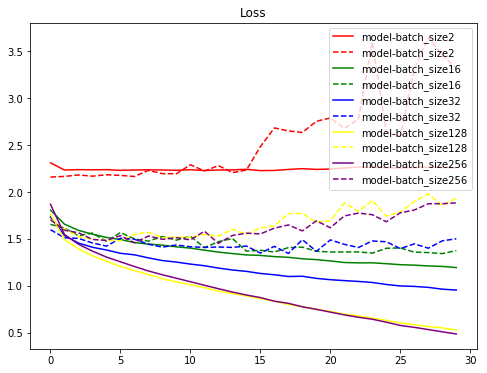

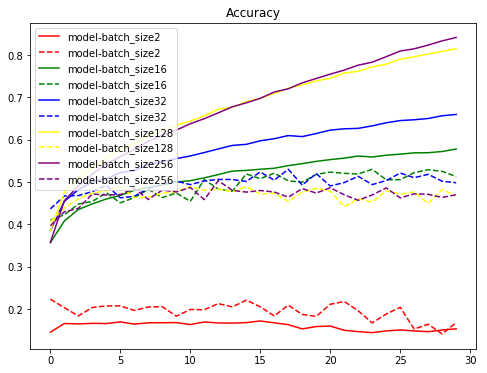

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'yellow', 'purple']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [20]:
from keras.layers import Activation
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x) 
            x = Activation('relu')(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [22]:
results = {}
keras.backend.clear_session()
print('Experiment with Batch Size %.6f' % (BATCH_SIZE))

model = build_mlp2(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=bn,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']
name_tag = f'model-batch_size{str(bn)}'
results[name_tag] = {'train-loss':train_loss,
                     'valid-loss':valid_loss,
                     'train-acc':train_acc,
                     'valid-acc':valid_acc}

Experiment with Batch Size 1024.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 2

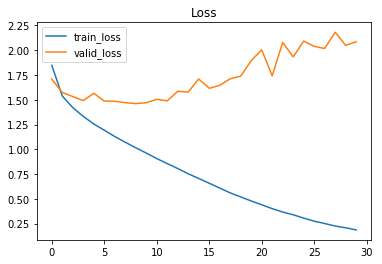

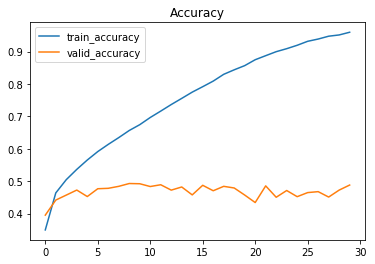

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train_loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid_loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train_accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid_accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


In [24]:
def build_mlp3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation='relu',
                               name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [26]:
results = {}
keras.backend.clear_session()
print('Experiment with Batch Size %.6f' % (BATCH_SIZE))

model = build_mlp2(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=bn,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']
name_tag = f'model-batch_size{str(bn)}'
results[name_tag] = {'train-loss':train_loss,
                     'valid-loss':valid_loss,
                     'train-acc':train_acc,
                     'valid-acc':valid_acc}

Experiment with Batch Size 1024.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 2

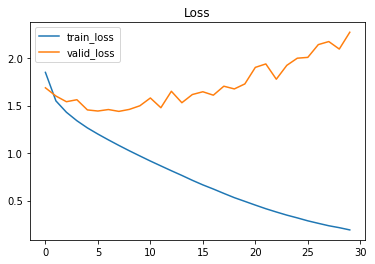

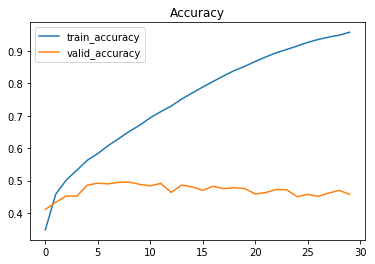

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train_loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid_loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train_accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid_accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()